In [3]:
!wget https://www.statmt.org/europarl/v7/fr-en.tgz
!tar -xf fr-en.tgz

--2023-12-10 12:20:53--  https://www.statmt.org/europarl/v7/fr-en.tgz
Resolving www.statmt.org (www.statmt.org)... 129.215.32.28
Connecting to www.statmt.org (www.statmt.org)|129.215.32.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202718517 (193M) [application/x-gzip]
Saving to: ‘fr-en.tgz’

fr-en.tgz           100%[===================>] 193.33M   101MB/s    in 1.9s    

2023-12-10 12:20:55 (101 MB/s) - ‘fr-en.tgz’ saved [202718517/202718517]



In [4]:
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2023-12-10 12:21:03--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.239.83.69, 18.239.83.32, 18.239.83.126, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.239.83.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.03s   

2023-12-10 12:21:03 (86.7 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Itali

In [5]:
import re
import string
import unicodedata
import pickle
import pandas as pd 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# split a loaded document into sentences
def to_sentences(doc):
	return doc.strip().split('\n')

# clean a list of lines
def clean_lines(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for line in lines:
		# normalize unicode characters
		line = unicodedata.normalize('NFD', line).encode('ascii', 'ignore')
		line = line.decode('UTF-8')
		# tokenize on white space
		line = line.split()
		# convert to lower case
		line = [word.lower() for word in line]
		# remove punctuation from each token
		line = [word.translate(table) for word in line]
		# remove non-printable chars form each token
		line = [re_print.sub('', w) for w in line]
		# remove tokens with numbers in them
		line = [word for word in line if word.isalpha()]
		# store as string
		cleaned.append(' '.join(line))
	return cleaned

# save a list of clean sentences to file
def save_clean_sentences(sentences, filename):
	pickle.dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load English data
filename = 'europarl-v7.fr-en.en'
doc = load_doc(filename)
sentences = to_sentences(doc)
sentences = clean_lines(sentences)
save_clean_sentences(sentences, 'english.pkl')
# spot check
for i in range(10):
	print(sentences[i])

# load French data
filename = 'europarl-v7.fr-en.fr'
doc = load_doc(filename)
sentences = to_sentences(doc)
sentences = clean_lines(sentences)
save_clean_sentences(sentences, 'french.pkl')
# spot check
for i in range(1):
	print(sentences[i])
#This will take our WMT2014 datasets and clean them of any punctuation, uppercase letters, non-printable characters, and tokens with numbers in them. Then it pickles the files for later use.

with open('french.pkl', 'rb') as f:
    fr_voc = pickle.load(f)

with open('english.pkl', 'rb') as f:
    eng_voc = pickle.load(f)
    
data = pd.DataFrame(zip(eng_voc, fr_voc), columns = ['English', 'French'])
data

Saved: english.pkl
resumption of the session
i declare resumed the session of the european parliament adjourned on friday december and i would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period
although as you will have seen the dreaded millennium bug failed to materialise still the people in a number of countries suffered a series of natural disasters that truly were dreadful
you have requested a debate on this subject in the course of the next few days during this partsession
in the meantime i should like to observe a minute s silence as a number of members have requested on behalf of all the victims concerned particularly those of the terrible storms in the various countries of the european union
please rise then for this minute s silence
the house rose and observed a minute s silence
madam president on a point of order
you will be aware from the press and television that there have been a number of bomb explosions and killings in sri

,English,French
0,resumption of the session,reprise de la session
1,i declare resumed the session of the european ...,je declare reprise la session du parlement eur...
2,although as you will have seen the dreaded mil...,comme vous avez pu le constater le grand bogue...
3,you have requested a debate on this subject in...,vous avez souhaite un debat a ce sujet dans le...
4,in the meantime i should like to observe a min...,en attendant je souhaiterais comme un certain ...
...,...,...
2007718,i would also like although they are absent to ...,je me permettrai meme bien quils soient absent...
2007719,i am not going to reopen the millennium or not...,je ne rouvrirai pas le debat sur le millenaire...
2007720,adjournment of the session,interruption de la session
2007721,i declare the session of the european parliame...,je declare interrompue la session du parlement...


In [6]:
data2 = pd.read_csv('/kaggle/working/data/eng-fra.txt', delimiter='\t', names = ['English', 'French'])
data2

,English,French
0,Go.,Va !
1,Run!,Cours !
2,Run!,Courez !
3,Wow!,Ça alors !
4,Fire!,Au feu !
...,...,...
135837,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
135838,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
135839,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
135840,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


In [7]:
data = pd.concat([data,data2], ignore_index= True, axis = 0)

data.to_csv('eng-fra.txt')
data

,English,French
0,resumption of the session,reprise de la session
1,i declare resumed the session of the european ...,je declare reprise la session du parlement eur...
2,although as you will have seen the dreaded mil...,comme vous avez pu le constater le grand bogue...
3,you have requested a debate on this subject in...,vous avez souhaite un debat a ce sujet dans le...
4,in the meantime i should like to observe a min...,en attendant je souhaiterais comme un certain ...
...,...,...
2143560,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
2143561,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
2143562,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
2143563,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


In [8]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import torchtext
from torchtext.data import get_tokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [10]:
import re

def normalizeString(s):
    s = s.lower().strip()
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('%s-%s.txt' % (lang1, lang2), encoding='utf-8').read().strip().split('\n')
    
    #Split every line into pairs and normalize
    #pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]
    pairs = []
    #print(lines[0])
    for line in lines:
        
        parts = line.split(',')[1:]
        #print(len(parts))
        if len(parts) == 2:
            #print(pairs)
            pairs.append([normalizeString(s) for s in parts])


    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

In [11]:
MAX_LENGTH = 10

eng_prefixes = [
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re ", "I don t", "Do you", "I want", "Are you", "I have", "I think",
       "I can t", "I was", "He is", "I m not", "This is", "I just", "I didn t",
       "I am", "I thought", "I know", "Tom is", "I had", "Did you", "Have you",
       "Can you", "He was", "You don t", "I d like", "It was", "You should",
       "Would you", "I like", "It is", "She is", "You can t", "He has",
       "What do", "If you", "I need", "No one", "You are", "You have",
       "I feel", "I really", "Why don t", "I hope", "I will", "We have",
       "You re not", "You re very", "She was", "I love", "You must", "I can"]
eng_prefixes = (map(lambda x: x.lower(), eng_prefixes))
#eng_prefixes = set(eng_prefixes)
eng_prefixes = tuple(eng_prefixes)

def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]
eng_prefixes

('i am ',
 'i m ',
 'he is',
 'he s ',
 'she is',
 'she s ',
 'you are',
 'you re ',
 'we are',
 'we re ',
 'they are',
 'they re ',
 'i don t',
 'do you',
 'i want',
 'are you',
 'i have',
 'i think',
 'i can t',
 'i was',
 'he is',
 'i m not',
 'this is',
 'i just',
 'i didn t',
 'i am',
 'i thought',
 'i know',
 'tom is',
 'i had',
 'did you',
 'have you',
 'can you',
 'he was',
 'you don t',
 'i d like',
 'it was',
 'you should',
 'would you',
 'i like',
 'it is',
 'she is',
 'you can t',
 'he has',
 'what do',
 'if you',
 'i need',
 'no one',
 'you are',
 'you have',
 'i feel',
 'i really',
 'why don t',
 'i hope',
 'i will',
 'we have',
 'you re not',
 'you re very',
 'she was',
 'i love',
 'you must',
 'i can')

In [12]:
def prepareData(lang1, lang2,reverse = False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
if len(pairs) > 0:
    print(random.choice(pairs))
#print(random.choice(pairs))

Reading lines...
Read 2132020 sentence pairs
Trimmed to 54225 sentence pairs
Counting words...
Counted words:
fra 15457
eng 10418
['cest incontestable', 'this is not in dispute']


In [13]:
from tqdm import tqdm

In [14]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size // 2, bidirectional=True)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(2, 1, self.hidden_size // 2, device=device)

In [15]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [16]:
from sklearn.model_selection import train_test_split


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
def split_dataset(pairs, test_size=0.3, val_size=0.5):
    train_pairs, test_pairs = train_test_split(pairs, test_size=test_size, random_state=42)
    val_pairs, test_pairs = train_test_split(test_pairs, test_size=val_size, random_state=42)
    
    return train_pairs, val_pairs, test_pairs

In [18]:
def evaluate(encoder, decoder, pairs, criterion, max_length=MAX_LENGTH):
    with torch.no_grad():
        total_loss = 0
        correct = 0
        total = 0

        for pair in pairs:
            input_tensor, target_tensor = tensorsFromPair(pair)
            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            encoder_hidden = encoder.initHidden()

            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)

            # Adjust the hidden state for the decoder: concatenate the forward and backward states
            decoder_hidden = torch.cat((encoder_hidden[0:1], encoder_hidden[1:2]), 2)

            decoder_input = torch.tensor([[SOS_token]], device=device)

            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)

                if topi.squeeze().item() == target_tensor[di].item():
                    correct += 1
                total_loss += criterion(decoder_output, target_tensor[di]).item()
                decoder_input = topi.squeeze().detach()

                if decoder_input.item() == EOS_token:
                    break

            total += target_length

        avg_loss = total_loss / total
        accuracy = correct / total
        return avg_loss, accuracy


In [19]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    loss = 0
    correct = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)

    # Adjust the hidden state for the decoder
    decoder_hidden = (torch.cat((encoder_hidden[0][0:1], encoder_hidden[0][1:2]), 2),
                      torch.cat((encoder_hidden[1][0:1], encoder_hidden[1][1:2]), 2))

    decoder_input = torch.tensor([[SOS_token]], device=device)

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)

        if topi.squeeze().item() == target_tensor[di].item():
            correct += 1

        loss += criterion(decoder_output, target_tensor[di])
        if use_teacher_forcing:
            decoder_input = target_tensor[di]  # Teacher forcing
        else:
            decoder_input = topi.squeeze().detach()

        if decoder_input.item() == EOS_token:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    accuracy = correct / float(target_length)
    return loss.item() / target_length, accuracy


In [20]:
import matplotlib.pyplot as plt


In [27]:
import time
import math


def timeSince(since, percent):
    now = time.time()
    elapsed = now - since
    remaining = elapsed / percent - elapsed
    return '%s (- %s)' % (asMinutes(elapsed), asMinutes(remaining))

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def tensorFromSentence(lang, sentence):
    # Implement the logic to convert a sentence to a tensor
    # For example:
    indexes = [lang.word2index[word] for word in sentence.split()]
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    # Implement the logic to convert a pair to tensors
    # For example:
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

def plot_metrics(training_losses, validation_losses, training_accuracies, validation_accuracies):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(training_accuracies, label='Training Accuracy')
    plt.plot(validation_accuracies, label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()




def trainIters(encoder, decoder, num_epochs, train_pairs, val_pairs, learning_rate=0.01):
    start = time.time()
    training_losses = []
    validation_losses = []
    training_accuracies = []
    validation_accuracies = []

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in tqdm(range(1, num_epochs + 1), desc="Training Epochs"):
        epoch_training_losses = []
        epoch_training_accuracies = []

        for training_pair in train_pairs:
            input_tensor, target_tensor = tensorsFromPair(training_pair)

            encoder_hidden = encoder.initHidden()

            encoder_optimizer.zero_grad()
            decoder_optimizer.zero_grad()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0
            correct = 0

            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)

            # Adjust the hidden state for the decoder: concatenate the forward and backward states
            decoder_hidden = torch.cat((encoder_hidden[0:1], encoder_hidden[1:2]), 2)

            decoder_input = torch.tensor([[SOS_token]], device=device)

            use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)

                if topi.squeeze().item() == target_tensor[di].item():
                    correct += 1

                loss += criterion(decoder_output, target_tensor[di])
                if use_teacher_forcing:
                    decoder_input = target_tensor[di]  # Teacher forcing
                else:
                    decoder_input = topi.squeeze().detach()

                if decoder_input.item() == EOS_token:
                    break

            loss.backward()

            encoder_optimizer.step()
            decoder_optimizer.step()

            accuracy = correct / float(target_length)
            epoch_training_losses.append(loss.item() / target_length)
            epoch_training_accuracies.append(accuracy)

        avg_training_loss = sum(epoch_training_losses) / len(epoch_training_losses)
        avg_training_accuracy = sum(epoch_training_accuracies) / len(epoch_training_accuracies)
        training_losses.append(avg_training_loss)
        training_accuracies.append(avg_training_accuracy)

        val_loss, val_accuracy = evaluate(encoder, decoder, val_pairs, criterion)
        validation_losses.append(val_loss)
        validation_accuracies.append(val_accuracy)

        tqdm.write(f'End of Epoch {epoch} - Training Loss: {avg_training_loss:.4f}, Training Accuracy: {avg_training_accuracy * 100:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

    # Plotting training and validation metrics
    plot_metrics(training_losses, validation_losses, training_accuracies, validation_accuracies)

    




In [30]:
# Check the first few pairs
for i in range(5):
    print(train_pairs[i])

# Test the tensor conversion on the first pair
input_tensor, target_tensor = tensorsFromPair(train_pairs[0])
print("Input tensor:", input_tensor)
print("Target tensor:", target_tensor)


['je suis d sol d avoir rat votre anniversaire .', 'i m sorry i missed your birthday .']
['quand on vit dans un pays il est evident quon doit egalement pouvoir comprendre la langue de ce pays', 'if you live in a country it is clear that you must also be able to understand the language of the country']
['nous avons raison devoquer dans notre resolution un soutien financier en faveur de la readaptation et de la reintegration des victimes', 'it is right and proper that in our resolution we also talk of money for the rehabilitation and reintegration of victims']
['je dois dire au commissairemichel que la facon normale de reagir a ce genre devenement serait de demissionner', 'i have to say to commissionermichel that the normal response to something like that would be to resign']
['j ai eu une enfance horrible .', 'i had a horrible childhood .']
Input tensor: tensor([[   54],
        [   55],
        [  136],
        [ 4379],
        [  136],
        [  331],
        [40140],
        [   78]

Training Epochs:   5%|▌         | 1/20 [08:19<2:38:03, 499.15s/it]

End of Epoch 1 - Training Loss: 3.1584, Training Accuracy: 41.96%, Validation Loss: 2.7597, Validation Accuracy: 40.33%


Training Epochs:  10%|█         | 2/20 [16:44<2:30:45, 502.54s/it]

End of Epoch 2 - Training Loss: 2.4447, Training Accuracy: 52.61%, Validation Loss: 2.5731, Validation Accuracy: 43.19%


Training Epochs:  15%|█▌        | 3/20 [25:10<2:22:53, 504.34s/it]

End of Epoch 3 - Training Loss: 2.1081, Training Accuracy: 57.08%, Validation Loss: 2.4976, Validation Accuracy: 44.87%


Training Epochs:  20%|██        | 4/20 [33:41<2:15:13, 507.06s/it]

End of Epoch 4 - Training Loss: 1.8768, Training Accuracy: 59.94%, Validation Loss: 2.5223, Validation Accuracy: 46.72%


Training Epochs:  25%|██▌       | 5/20 [42:13<2:07:08, 508.60s/it]

End of Epoch 5 - Training Loss: 1.6964, Training Accuracy: 62.52%, Validation Loss: 2.6103, Validation Accuracy: 47.18%


Training Epochs:  30%|███       | 6/20 [50:45<1:59:00, 510.05s/it]

End of Epoch 6 - Training Loss: 1.5633, Training Accuracy: 64.27%, Validation Loss: 2.6268, Validation Accuracy: 47.51%


Training Epochs:  35%|███▌      | 7/20 [59:20<1:50:48, 511.46s/it]

End of Epoch 7 - Training Loss: 1.4480, Training Accuracy: 65.77%, Validation Loss: 2.6711, Validation Accuracy: 47.49%


Training Epochs:  40%|████      | 8/20 [1:07:54<1:42:29, 512.42s/it]

End of Epoch 8 - Training Loss: 1.3485, Training Accuracy: 67.34%, Validation Loss: 2.6540, Validation Accuracy: 47.62%


Training Epochs:  45%|████▌     | 9/20 [1:16:28<1:34:00, 512.80s/it]

End of Epoch 9 - Training Loss: 1.2672, Training Accuracy: 68.41%, Validation Loss: 2.6502, Validation Accuracy: 47.17%


Training Epochs:  50%|█████     | 10/20 [1:25:02<1:25:30, 513.06s/it]

End of Epoch 10 - Training Loss: 1.2021, Training Accuracy: 69.17%, Validation Loss: 2.7231, Validation Accuracy: 47.41%


Training Epochs:  55%|█████▌    | 11/20 [1:33:35<1:16:59, 513.26s/it]

End of Epoch 11 - Training Loss: 1.1425, Training Accuracy: 70.38%, Validation Loss: 2.7080, Validation Accuracy: 47.76%


Training Epochs:  60%|██████    | 12/20 [1:42:10<1:08:30, 513.82s/it]

End of Epoch 12 - Training Loss: 1.0852, Training Accuracy: 71.36%, Validation Loss: 2.8243, Validation Accuracy: 47.28%


Training Epochs:  65%|██████▌   | 13/20 [1:50:45<59:59, 514.17s/it]  

End of Epoch 13 - Training Loss: 1.0423, Training Accuracy: 72.15%, Validation Loss: 2.8113, Validation Accuracy: 48.04%


Training Epochs:  70%|███████   | 14/20 [1:59:20<51:26, 514.40s/it]

End of Epoch 14 - Training Loss: 1.0122, Training Accuracy: 72.80%, Validation Loss: 2.9447, Validation Accuracy: 47.51%


Training Epochs:  75%|███████▌  | 15/20 [2:07:55<42:52, 514.48s/it]

End of Epoch 15 - Training Loss: 0.9819, Training Accuracy: 73.40%, Validation Loss: 2.9437, Validation Accuracy: 47.74%


Training Epochs:  80%|████████  | 16/20 [2:16:30<34:18, 514.70s/it]

End of Epoch 16 - Training Loss: 0.9630, Training Accuracy: 73.73%, Validation Loss: 2.9289, Validation Accuracy: 47.52%


Training Epochs:  85%|████████▌ | 17/20 [2:25:05<25:44, 514.77s/it]

End of Epoch 17 - Training Loss: 0.9536, Training Accuracy: 73.87%, Validation Loss: 2.9499, Validation Accuracy: 47.46%


Training Epochs:  90%|█████████ | 18/20 [2:33:43<17:11, 515.83s/it]

End of Epoch 18 - Training Loss: 0.9356, Training Accuracy: 74.32%, Validation Loss: 2.9907, Validation Accuracy: 47.54%


Training Epochs:  95%|█████████▌| 19/20 [2:42:21<08:36, 516.21s/it]

End of Epoch 19 - Training Loss: 0.9290, Training Accuracy: 74.39%, Validation Loss: 3.0763, Validation Accuracy: 47.73%


Training Epochs: 100%|██████████| 20/20 [2:50:56<00:00, 512.82s/it]


End of Epoch 20 - Training Loss: 0.9192, Training Accuracy: 74.68%, Validation Loss: 3.0895, Validation Accuracy: 47.17%


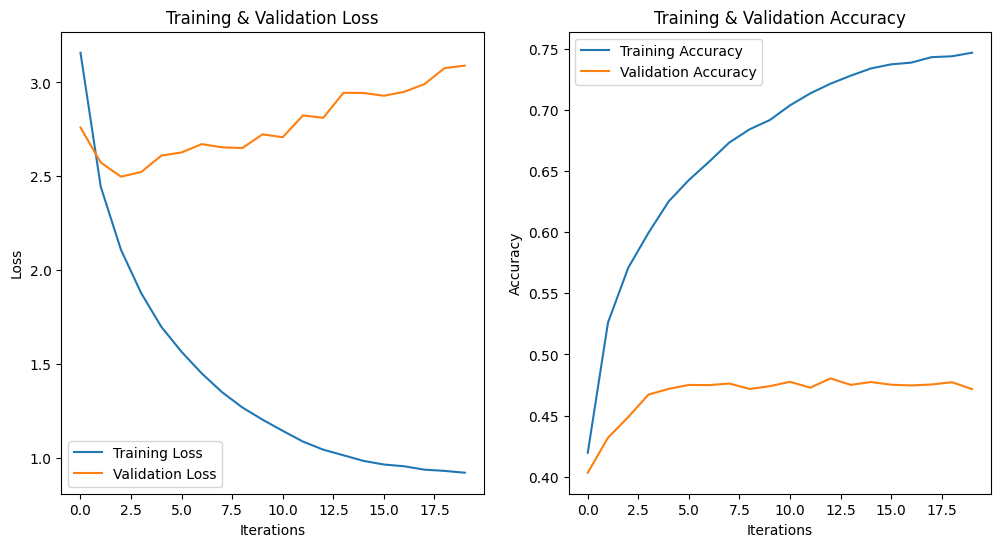

In [28]:
hidden_size = 256

# Split your dataset into training, validation, and test sets
train_pairs, val_pairs, test_pairs = split_dataset(pairs, test_size=0.3, val_size=0.5)

# Initialize your models
encoder = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder = DecoderRNN(hidden_size, output_lang.n_words).to(device)

# Define the number of epochs
num_epochs = 20

# Start the training process for the specified number of epochs
trainIters(encoder, attn_decoder, num_epochs, train_pairs, val_pairs)


In [30]:
test_loss, test_accuracy = evaluate(encoder, attn_decoder, test_pairs, nn.CrossEntropyLoss(), MAX_LENGTH)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

Test Loss: 3.1276, Test Accuracy: 46.94%


In [53]:
torch.save(encoder.state_dict(), 'BiD-GRUencoder_state.pth')
torch.save(attn_decoder.state_dict(), 'BiD-GRUdecoder_state.pth')

In [46]:
 plot_metrics(training_losses, validation_losses, training_accuracies, validation_accuracies)

NameError: name 'training_losses' is not defined

In [23]:
# Load the model weights
hidden_size = 256
# Split your dataset into training, validation, and test sets
train_pairs, val_pairs, test_pairs = split_dataset(pairs, test_size=0.3, val_size=0.5)

# Initialize your models
encoder = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder = DecoderRNN(hidden_size, output_lang.n_words).to(device)

# Define the number of epochs
num_epochs = 15


encoder.load_state_dict(torch.load('/kaggle/input/bid-gru/BiD-GRUencoder_state (2).pth'))
decoder.load_state_dict(torch.load('/kaggle/input/bid-gru/BiD-GRUdecoder_state (1).pth'))

# Start the training process for the specified number of epochs
trainIters(encoder, attn_decoder, num_epochs, train_pairs, val_pairs)

RuntimeError: Error(s) in loading state_dict for EncoderRNN:
	size mismatch for embedding.weight: copying a param with shape torch.Size([34935, 256]) from checkpoint, the shape in current model is torch.Size([15457, 256]).